### Data Preprocessing Techniques

We have to make sure that same pre-processing should be applied to both training and test set <br>

**Cleaning (sklearn.preprocessing) -->** standardization, missing value imputation

**feature extraction (sklearn.feature_extraction)** <br>
**feature reduction (sklearn.decomposition)**

* Data cleaning
    * Data Imputation
    * Feature Scaling <br>
* Feature transformations
    * Polynomial Features
    * Discretization
    * Handling categorical variables
    * Custom Transformers
    * Composite Transformers
        * Apply composite feature to diverse features
        * TargetTransformRegressor <br>
* Feature Selection
    * Filter based methods
    * Wrapper based Methods <br>
* Feature extraction
    * PCA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

### 1. Feature Extraction
#### DictVectorizer
DictVectorizer converts a list of dictionary objects to feature matrix

In [3]:
data = [{'age' : 4, 'height' : 96.0},
        {'age' : 1, 'height' : 73.9},
        {'age' : 3, 'height' : 88.9},    
        {'age' : 2, 'height' : 81.6}]

In [4]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed, data_transformed.shape

(array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]),
 (4, 2))

### FeatureHasher 

* high-speed, low-memory vectorizer that uses feature hashing technique 
* instead of building a hash table of the features, as the vectorizers do, it applies a hash function to the features to determine their column index in sample matrics directly 
* this results in increased speed and reduced memory usage, at the expense of inspecability; the hasher does not remember what the input features looked like and has no inverse_transform method

In [5]:
# used for text classification where we have high dimensional feature vector 
from sklearn.feature_extraction import FeatureHasher
dv = FeatureHasher(n_features=5)
data_transformed = dv.fit_transform(data)
data_transformed.toarray(), data_transformed.shape # returs a sparse matrix

(array([[ 0. ,  0. ,  0. , 96. ,  4. ],
        [ 0. ,  0. ,  0. , 73.9,  1. ],
        [ 0. ,  0. ,  0. , 88.9,  3. ],
        [ 0. ,  0. ,  0. , 81.6,  2. ]]),
 (4, 5))

* sklearn.feature_extraction.image.* --> for image 
* sklearn.feature_extraction.text.* --> for text 

### 2. Data Imputation
* Many ML algos need full feature matrix
* Data Imputation identifies missing values in each features and replaces them with a strategy such as
    * Mean/Median/mode.
    * user specified constant value. <br>
    
sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose

`add_indicator` is a boolean parameter when set to `True` returns missing value indicators

**KNNImputer** 
* Use k-nearest neighbours to fill missing value 
    * The missing value of an attribute in a specific example is filled with the mean value of the same of `n_neighbors` closest neighbors 
* the nearest neighbors are decided based on Euclidean distance

In [6]:
x = np.array([[7, 1,], [np.nan, 8], [2, np.nan], [9, 6]])
x

array([[ 7.,  1.],
       [nan,  8.],
       [ 2., nan],
       [ 9.,  6.]])

In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy= 'mean')
si.fit_transform(x)

array([[7., 1.],
       [6., 8.],
       [2., 5.],
       [9., 6.]])

In [8]:
si = SimpleImputer(strategy= 'median')
si.fit_transform(x)

array([[7., 1.],
       [7., 8.],
       [2., 6.],
       [9., 6.]])

In [9]:
si = SimpleImputer(strategy= 'most_frequent')
si.fit_transform(x)

array([[7., 1.],
       [2., 8.],
       [2., 1.],
       [9., 6.]])

In [10]:
si = SimpleImputer(strategy= 'constant')
si.fit_transform(x)

array([[7., 1.],
       [0., 8.],
       [2., 0.],
       [9., 6.]])

In [11]:
x = np.array([[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]])
x

array([[ 1.,  2., nan],
       [ 3.,  4.,  3.],
       [nan,  6.,  5.],
       [ 8.,  8.,  7.]])

In [12]:
from sklearn.impute import KNNImputer
# finds the nearest samples using euclidean distance. 
# we compare the points between 2 samples
#    where we don't have missing value in the current sample 
# finally fill the value by mean of the nearest neighbors  
ki = KNNImputer(n_neighbors=2, weights= 'uniform')
ki.fit_transform(x)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

#### Feature Scaling

not required for tree based algorithms

**StandardScaler** scales the parameter to mean = 0, sd = 1 <br>
**MinMaxScaler** scales the parameter intp the range 0 to 1 <br>
**MaxAbsScaler** scales the parameter intp the range -1 to 1 <br>
max abs value = max(x.max, |x.min|) ==> mx(5, |-100|) = 100 --> X / max abs value

In [13]:
X = np.array([[128, 2, 4, 512], [2, 256, 1, 64]])
X1 = np.array([[-128, 2, 4, -512], [2, 256, -1, 64]])
X2 = np.array([[1, 2, 3, 4], [5, 6, 7, 0]])
X3 = np.array([0, 0.125, 0.25, 0.375, 0.5, 0.675, 0.75, 0.875, 1.0])
X4 = np.array([0, 1, 2, 3, 4])

In [14]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(np.log2) # any user defined function
ft.fit_transform(X)

array([[7., 1., 2., 9.],
       [1., 8., 0., 6.]])

In [15]:
ft = FunctionTransformer(np.sqrt)
ft.fit_transform(X)

array([[11.3137085 ,  1.41421356,  2.        , 22.627417  ],
       [ 1.41421356, 16.        ,  1.        ,  8.        ]])

In [16]:
def myFunc(num) : 
    return [i*2 for i in num]

myFunc([1, 2, 3])
ft = FunctionTransformer(myFunc)
ft.fit_transform(X4)

[0, 2, 4, 6, 8]

In [17]:
from sklearn.preprocessing import MinMaxScaler
ft = MinMaxScaler()
ft.fit_transform(X1)

array([[0., 0., 1., 0.],
       [1., 1., 0., 1.]])

In [18]:
from sklearn.preprocessing import MaxAbsScaler
ft = MaxAbsScaler()
ft.fit_transform(X1)

array([[-1.       ,  0.0078125,  1.       , -1.       ],
       [ 0.015625 ,  1.       , -0.25     ,  0.125    ]])

In [24]:
from sklearn.preprocessing import StandardScaler
ft = StandardScaler()
ft.fit_transform(X)

array([[ 1., -1.,  1.,  1.],
       [-1.,  1., -1., -1.]])

In [25]:
from sklearn.preprocessing import RobustScaler
ft = RobustScaler()
ft.fit_transform(X)

array([[ 1., -1.,  1.,  1.],
       [-1.,  1., -1., -1.]])

In [27]:
from sklearn.preprocessing import PolynomialFeatures
ft = PolynomialFeatures(degree = 2) # [x1, x2, x1x2, x1^2, x2^2]
ft.fit_transform(X2)  

array([[ 1.,  1.,  2.,  3.,  4.,  1.,  2.,  3.,  4.,  4.,  6.,  8.,  9.,
        12., 16.],
       [ 1.,  5.,  6.,  7.,  0., 25., 30., 35.,  0., 36., 42.,  0., 49.,
         0.,  0.]])

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
ft = KBinsDiscretizer(n_bins = 5, strategy = 'uniform', encode = 'ordinal')
ft.fit_transform(X3.reshape(-1, 1)) # splitted in 5 diff uniform bins 

array([[0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],
       [4.],
       [4.]])

##### Categorical Transformers 

In [29]:
X = [['Male', 1], ['Female', 3], ['Female', 2]]
x1 = np.array([1, 2, 3, 1])
x2 = np.array([1, 2, 6, 1, 8, 6])

movie_genres = [{'action', 'comedy'},
                {'comedy'},
                {'action', 'thriller'},
                {'science-fiction', 'action', 'thriller'} ]

In [30]:
from sklearn.preprocessing import OneHotEncoder
ft = OneHotEncoder()
ft.fit_transform(x1.reshape(-1, 1)).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [31]:
from sklearn.preprocessing import LabelEncoder
ft = LabelEncoder() # encodes between 0 - k-1
# unique --> (1, 2, 6, 8) ==> (0, 1, 2, 3)
ft.fit_transform(x2.reshape(-1, 1))

c:\Users\Computer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 0, 3, 2], dtype=int64)

OrdinalEncoder can operate on multi dimensional data, while LabelEncoder can transform only 1D data 

In [32]:
from sklearn.preprocessing import OrdinalEncoder
ft = OrdinalEncoder()
ft.fit_transform(X)  

array([[1., 0.],
       [0., 2.],
       [0., 1.]])

LabelBinarizer has to be used if you want to extend regression and binary classification algo that don't support multiclass setup

In [33]:
from sklearn.preprocessing import LabelBinarizer
ft = LabelBinarizer()
ft.fit_transform(x2) # num of col == unique value 

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0]])

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
ft = MultiLabelBinarizer()
ft.fit_transform(movie_genres) # num of col == unique value 

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

In [35]:
from sklearn.preprocessing import add_dummy_feature
add_dummy_feature(x1.reshape(-1, 1))

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 1.]])

## Feature Selection

### Filter based 

#### VarianceThreshold
This transformer helps to keep only high variance features by providing a certain threshold.

removes features with variance less than a certain threshold

In [36]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [37]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

**SelectFpr** --> select features based on a false positive rate <br>
**SelectFdr** --> select features based on a estimated false discovery rate <br>
**SelectFwr** --> select features based on a family-wise error rate 

#### univariate scoring function 

three classes of scoring functions are proposed <br>
* Mutual information <br>
    measures dependecy b/w 2 variables --> return `non -ve` value <br>
    MI = 0 --> indp var 
    high MI --> higher dependency 
* Chi-sq <br>
    measures dependency b/w 2 variables. <br>
    computes chi-sq stat b/w 2 `non -ve` feature and class label <br>
    higher chi-sq values indicates that the features and labels are likely to be correlated 
* F-statistics 

MI and F-stat can be used in both classification and regression problems. <br>
Chi-sq can be used only in classification prob

In [38]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, chi2
from sklearn.datasets import fetch_california_housing

#Download data
X_cal, y_cal = fetch_california_housing(return_X_y=True)

#Select a subset of data
X, y = X_cal[:2000,:], y_cal[:2000]

print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


In [39]:
skb = SelectKBest(mutual_info_regression, k = 3)
# skb = SelectKBest(chi2, k = 3)
X_new = skb.fit_transform(X, y)

print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [40]:
from sklearn. feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
# sp = SelectPercentile(chi2, percentile = 30)
X_new = sp.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [41]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 5)
# gus = GenericUnivariateSelect(chi2, mode = 'k_best', param = 20)
X_new = gus.fit_transform(X, y)
print(f'Shape of feature matrix before feature selection:{X.shape}')
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 8)
Shape of feature matrix after feature selection:(2000, 5)


> DO NOT USE REGRESSION FEATURE SCROING FUNCTION WITH CLASSIFICATION PROBLEM
> IT WILL LEAD TO USELESS RESULTS 

### Wrapper based Methods

#### RFE(Recursive Feature Elimination)

STEP 1 : Fits a model.

STEP 2 : Ranks the features, afterwards it removes one or more features dependent on step parameter.

STEP 3 : Repeat till we reach the desired number of features

> Use RFECV if you don't wanna specify num of features 

In [42]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

#support_ attribute is a boolean array
#marking which features are selected
print(selector.support_)

#rank of each feature
#if it's value is '1', Then it is selected
#features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is: {selector.ranking_}')

[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


In [43]:
X_new = selector.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


#### SelectFromModel
Select desired number of important features above certain threshold of feature importance as obtained from the trained estimator.

* The feature importance is obtained via coef_, feature_importances or an importance_getter callable from the trained estimator
* The feature importance threshold can be specified either numerically or through string argument based on built in heuristic such as mean, median and float multiples of these like 0.1*mean

In [44]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


#### SequentialFeatureSelector
It performs feature selection by selecting or deselecting features one by one in a greedy manner

*--> default forward*

add feature that gives the best cv score 

remove least important feature in backward elimination

> in general the results for both are not same

selecting 7 out of 10 then backward <br>
selecting 3 out of 10 then forward 

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector

%time

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

CPU times: total: 0 ns
Wall time: 0 ns
[ True False False False False  True  True False]


In [46]:
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]


In [47]:
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='forward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]


### Column transformation

apply different transformations on different columns 

In [48]:
X = np.array([['Male', 1], ['Female', 3], ['Female', 2]])

from sklearn.compose import ColumnTransformer
column_trans = ColumnTransformer(
    [ 
        ('genderEncoder', OneHotEncoder(dtype = 'int'), [0]), 
        ('ageScaler', MaxAbsScaler(), [1])
    ], remainder = 'drop', verbose_feature_names_out = False
)

column_trans.fit_transform(X)

array([[0.        , 1.        , 0.33333333],
       [1.        , 0.        , 1.        ],
       [1.        , 0.        , 0.66666667]])

#### Transforming Target for Regression

transforms the target variable before fitting the regression <br>
predicted values are mapped back to the original space via inv transform 

In [49]:
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

tt = TransformedTargetRegressor(regressor= LinearRegression(), 
                                func = np.log, inverse_func = np.exp
                        )

X = np.arange(4).reshape(-1, 1)
y = np.exp(2*X).ravel()
tt.fit(X, y) 

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())

### PCA 
unsupervised 

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

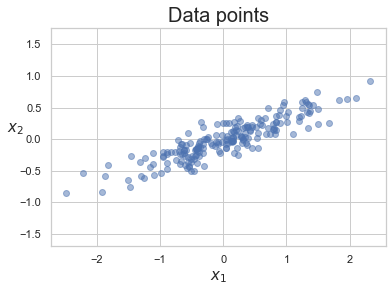

In [77]:
rand = np.random.RandomState(1)
X = np.dot(rand.rand(2, 2), rand.randn(2, 200)).T

plt.figure()
plt.title('Data points', size=20)

# set x and y labels
plt.xlabel('$x_1$', size=15)
plt.ylabel('$x_2$', size=15, rotation=0)

# plot the data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal')

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [79]:
print(f'The {pca.n_components_} principle axes are :\n', pca.components_)

The 2 principle axes are :
 [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [80]:
print('Explained variance by each component : ', pca.explained_variance_)

Explained variance by each component :  [0.7625315 0.0184779]


In [81]:
projections = X@pca.components_
print(projections.shape)

c3 = X[2]

arbitary_projection = X@c3
print(arbitary_projection.shape)

(200, 2)
(200,)


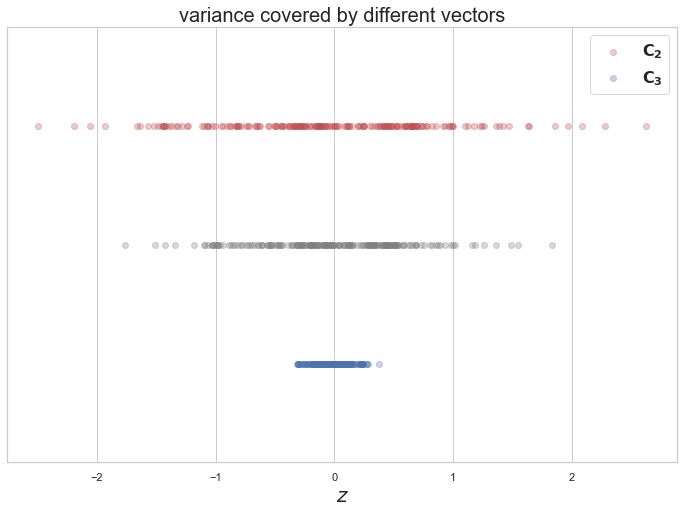

In [82]:
plt.figure(figsize=(12,8))

plt.scatter(projections[:, 0], 1+np.zeros((200, 1)), alpha=0.3, color='r')
plt.scatter(projections[:, 1], -1+np.zeros((200, 1)), alpha=0.3, color='b')
plt.scatter(arbitary_projection, np.zeros((200,)), alpha=0.3, color='grey')

plt.legend(['$\mathbf{C_2}$', '$\mathbf{C_3}$'], prop={'size': 16})
plt.title("variance covered by different vectors", size=20)

plt.ylim([-1.5, 1.5])
plt.yticks([], [])
plt.axis('equal')
plt.grid(True)
plt.xlabel('$z$', size=20)
plt.show()

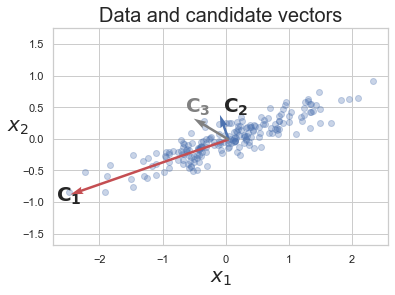

In [83]:
plt.figure()
plt.title('Data and candidate vectors', size=20)

# set x and y labels
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20, rotation=0)

# plot data points
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)

for length, principal_axis, axis_name, i_color in zip(pca.explained_variance_,
pca.components_,['$\mathbf{C_1}$', '$\mathbf{C_2}$'], ['r', 'b']):
    v = principal_axis * np.sqrt(length)
    v0, v1 = pca.mean_, pca.mean_ + v

    # draw principal axis
    plt.quiver(*v0, *(v1-v0), scale=0.33, scale_units='xy', color=i_color)

    # label the  principal axis
    plt.text(*(3.4*v1), axis_name, size=20)

# draw 3rd component
lengths = np.eye(2)
np.fill_diagonal(lengths, np.sqrt(pca.explained_variance_))

c3 = pca.mean_+[-0.5, 0.3]

plt.quiver(*pca.mean_,*(1.1*(c3-pca.mean_)), scale=1, scale_units='xy',
color='grey')

# label the  principal axis
plt.text(*(1.4*c3),'$\mathbf{C_3}$',size=20,color='grey')

plt.axis('equal')
plt.show()

In [50]:
X_cal, y_cal = fetch_california_housing(return_X_y=True)
X, y = X_cal[:2000,:], y_cal[:2000]

In [51]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

#### Chaining Transformers

The preprocessing transformations are applied one after the another on the input feature matrix. It is important to apply exactly the same transformation on training, evaluation and testing sets in the same order.

The sklearn.pipeline module provides utilities to build a compsite estimator, as a chain of transformers and estimators.

#### Pipeline
Sequencially apply a list if transformers and estimators.

* Intermediate steps of the pipeline must be 'transformers'. i.e. They must implement fit and transform methods.
* Final estimator only needs to implement fit
The purpose of the pipeline is to assemble several steps that can be cross-validated together whilesetting different parameters

#### Pipeline
A Pipeline can be created with Pipeline(). It takes a list of `('estimatorName', estimator(..))` tuples. The pipeline object exposes the interrface of the last step

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [
    ('simpleImputer', SimpleImputer()),
    ('standardscaler', StandardScaler())
]

pipe = Pipeline(steps=estimators)
pipe.fit_transform(X)

array([[ 2.32464934,  0.68980036,  0.21276093, ..., -0.2199803 ,
        -0.28449836, -0.50730068],
       [ 2.31218777, -0.73400966,  0.06715959, ..., -0.8085314 ,
        -0.31499693, -0.48980483],
       [ 1.76555431,  1.47289588,  0.46727564, ...,  0.10578509,
        -0.33024622, -0.52479652],
       ...,
       [-1.10086798,  0.97456237, -0.23305201, ...,  1.11898789,
        -2.03816656,  3.79667637],
       [-1.23710747,  0.54741936, -0.32949325, ...,  2.38643537,
        -2.00766798,  3.79667637],
       [-1.22035242, -0.80520017, -0.33310863, ..., -0.34252193,
        -2.02291727,  3.79667637]])

The same pipeline can als be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

In [53]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), 
                     StandardScaler())

Accessing Individual steps in a pipeline

In [62]:
from sklearn.decomposition import PCA

estimators = [
            ('simpleImputer', SimpleImputer()),
            ('pca', PCA()),
            ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators)

In [63]:
# Let's print number of steps in this pipeline
print(len(pipe.steps))

3


In [68]:
pipe.steps[2][1]

LinearRegression()

In [67]:
pipe[2]

LinearRegression()

In [65]:
pipe.named_steps.regressor

LinearRegression()

In [71]:
pipe['regressor']

LinearRegression()

In [56]:
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


`<estimator>__<parameterName>`

In [57]:
#Accessing parameters of a step

pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

In [58]:
pipe.named_steps.simpleImputer

SimpleImputer()

In [59]:
pipe['pca']

PCA(n_components=2)

#### GridSearch with pipeline

By using naming convention of nested parameters, grid search can be implemented.

passthrough --> no imputation and other two imputation <br>
2 diff models <br>
hyperparameter c

In [76]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer = ['passthrough',
                             SimpleImputer(),
                             KNNImputer()],
                    clf = [SVC(), LogisticRegression()],
                    clf__C = [0.1, 10, 100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

`c` is an inverse of regularization, lower its value stronger the regularisation is.
In the example above `clf__C` provides a set of values for grid search

#### Caching Transformers
Transforming data is a computationally expensive step.

* For grid search, transformers need not be applied for every parameter configuration. they can be applied once, and the transformed data can be reused.

This can be achieved by setting memory parameter of a pipeline object.

In [73]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()
tempDirPath

<TemporaryDirectory 'C:\\Users\\Computer\\AppData\\Local\\Temp\\tmp06qu_j76'>

In [78]:
estimators = [ 
                ('simpleImputer', SimpleImputer()),
                ('pca', PCA(2)),
                ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators, memory=tempDirPath)
# pipe = Pipeline(steps=estimators, memory='/path/to/cache/dir')

FeatureUnion
Concatenates results of multiple traansformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side by side into a largematrix.

FeatureUnion and Pipeline can be used to create complex transformers.

FeatureUnion apply transformation column wise --> 

pipeline apply transformation row wise ||<br>
-------------------------------------------\\/

In [76]:
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
    ('selector', ColumnTransformer([('select_first_4', 'passthrough', slice(0, 4))])), 
    ('imputer', SimpleImputer(strategy='median')), 
    ('std_scaler', StandardScaler())
])

cat_pipeline = ColumnTransformer([
        ('label_binarizer', LabelBinarizer(), [4])
    ])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline), 
    ('cat_pipeline', cat_pipeline)
])

from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])